In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sys
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils ,layers,models
from keras.layers import Dense, Dropout 
from keras.optimizers import RMSprop ,Adam,SGD,Adagrad,Adadelta,Adamax
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [2]:
labels = []
images = []
path='notMNIST_small'

# Reading Images and storing each pixel in Images Matrix
# Storing the corresponding labels in Labels Array
for label in os.listdir(path):
    label_path = os.path.join(path, label)
    
    if os.path.isdir(label_path):
        label_idx = ord(label) - ord('A')
        print(label_idx)
        for image_file_path in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file_path)
            
            try:
                with Image.open(image_path) as img:
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(label_idx)
            except Exception as e:
                print(f"Error reading {image_path}: {e}")

0
Error reading notMNIST_small\A\.ipynb_checkpoints: [Errno 13] Permission denied: 'notMNIST_small\\A\\.ipynb_checkpoints'
1
2
3
4
5
Error reading notMNIST_small\F\.ipynb_checkpoints: [Errno 13] Permission denied: 'notMNIST_small\\F\\.ipynb_checkpoints'
6
7
8
9


In [3]:
print("Total no of Images =",len(labels))
#print(images.shape)
print("No of Class_Label=",label_idx+1)
images=np.array(images)/255.0
labels=utils.to_categorical(np.array(labels),num_classes=10)
print(labels)

Total no of Images = 18723
No of Class_Label= 10
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42)

(28, 28)

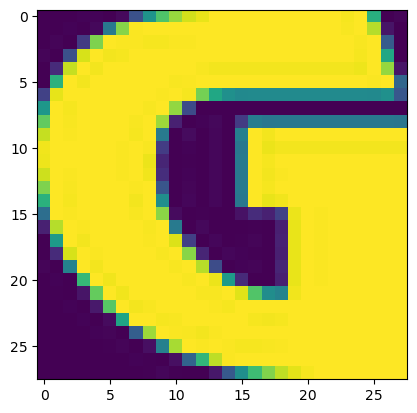

In [5]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[1])
X_train[1].shape

In [6]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(512, activation="Softmax"))
model.add(Dropout(0.2))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
model.compile(loss = 'categorical_crossentropy',     
   optimizer = Adam(learning_rate = 0.001), 
   metrics = ['accuracy'])

In [ ]:
history = model.fit(
   X_train, y_train, 
   batch_size = 128, 
   epochs = 1000, 
   verbose = 1, 
   validation_data = (X_test, y_test)
)

Epoch 1/1000


118/118 [==============================] - 5s 18ms/step - loss: 1.4894 - accuracy: 0.5068 - val_loss: 0.7761 - val_accuracy: 0.7186
Epoch 2/1000
118/118 [==============================] - 2s 14ms/step - loss: 0.8256 - accuracy: 0.7304 - val_loss: 0.4624 - val_accuracy: 0.8764
Epoch 3/1000
118/118 [==============================] - 2s 15ms/step - loss: 0.5831 - accuracy: 0.8270 - val_loss: 0.3498 - val_accuracy: 0.9041
Epoch 4/1000
118/118 [==============================] - 2s 15ms/step - loss: 0.4273 - accuracy: 0.8768 - val_loss: 0.3066 - val_accuracy: 0.9159
Epoch 5/1000
118/118 [==============================] - 2s 14ms/step - loss: 0.3165 - accuracy: 0.9115 - val_loss: 0.2683 - val_accuracy: 0.9218
Epoch 6/1000
118/118 [==============================] - 2s 14ms/step - loss: 0.2654 - accuracy: 0.9248 - val_loss: 0.2545 - val_accuracy: 0.9282
Epoch 7/1000
118/118 [==============================] - 2s 14ms/step - loss: 0.2181 - accuracy: 0.9365 - val_loss: 0.2574 - val_

In [ ]:
# Validation accuracy
(eval_loss, eval_accuracy) = model.evaluate(X_test,y_test, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

In [ ]:
# Training and validation graph for over & underfitting analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# building a linear stack of layers with the sequential model
model = models.Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',     
   optimizer = Adam(learning_rate = 0.001), 
   metrics = ['accuracy'])

In [13]:
history = model.fit(
   X_train, y_train, 
   batch_size = 128, 
   epochs = 1000, 
   verbose = 1, 
   validation_data = (X_test, y_test)
)

118/118 [==============================] - 3s 27ms/step - loss: 0.0127 - accuracy: 0.9966 - val_loss: 0.4159 - val_accuracy: 0.9290
Epoch 34/1000
118/118 [==============================] - 3s 27ms/step - loss: 0.0149 - accuracy: 0.9963 - val_loss: 0.4071 - val_accuracy: 0.9351
Epoch 35/1000
118/118 [==============================] - 4s 33ms/step - loss: 0.0092 - accuracy: 0.9980 - val_loss: 0.4219 - val_accuracy: 0.9330
Epoch 36/1000
118/118 [==============================] - 3s 28ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.4302 - val_accuracy: 0.9332
Epoch 37/1000
118/118 [==============================] - 3s 27ms/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.4357 - val_accuracy: 0.9324
Epoch 38/1000
118/118 [==============================] - 3s 27ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.4523 - val_accuracy: 0.9343
Epoch 39/1000
118/118 [==============================] - 3s 26ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.4347 - val_accuracy:

In [14]:
# Validation accuracy
(eval_loss, eval_accuracy) = model.evaluate(X_test,y_test, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

118/118 [==============================] - 1s 5ms/step - loss: 1.0296 - accuracy: 0.9306
[INFO] accuracy: 93.06%
[INFO] Loss: 1.0295900106430054


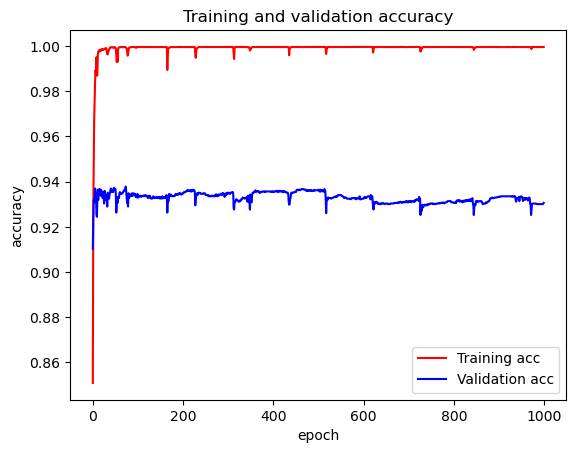

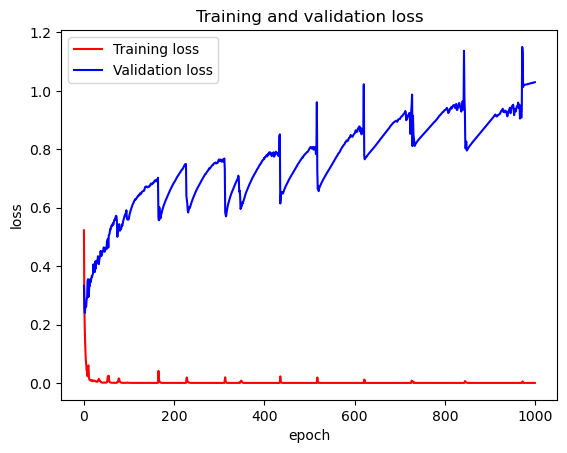

In [15]:
# Training and validation graph for over & underfitting analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [16]:
# building a linear stack of layers with the sequential model
model = models.Sequential()
# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(250, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
118/118 [==============================] - 22s 173ms/step - loss: 0.7701 - accuracy: 0.7506 - val_loss: 0.2765 - val_accuracy: 0.9162
Epoch 2/10
118/118 [==============================] - 21s 177ms/step - loss: 0.3001 - accuracy: 0.9103 - val_loss: 0.2319 - val_accuracy: 0.9314
Epoch 3/10
118/118 [==============================] - 20s 170ms/step - loss: 0.2476 - accuracy: 0.9233 - val_loss: 0.2350 - val_accuracy: 0.9266
Epoch 4/10
118/118 [==============================] - 20s 170ms/step - loss: 0.2157 - accuracy: 0.9360 - val_loss: 0.1911 - val_accuracy: 0.9415
Epoch 5/10
118/118 [==============================] - 21s 177ms/step - loss: 0.1761 - accuracy: 0.9453 - val_loss: 0.1725 - val_accuracy: 0.9482
Epoch 6/10
118/118 [==============================] - 20s 174ms/step - loss: 0.1589 - accuracy: 0.9507 - val_loss: 0.1669 - val_accuracy: 0.9487
Epoch 7/10
118/118 [==============================] - 20s 170ms/step - loss: 0.1759 - accuracy: 0.9457 - val_loss: 0.1704 - val_ac

In [17]:
# Validation accuracy
(eval_loss, eval_accuracy) = model.evaluate(X_test,y_test, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

118/118 [==============================] - 2s 17ms/step - loss: 0.1539 - accuracy: 0.9562
[INFO] accuracy: 95.62%
[INFO] Loss: 0.1539403349161148


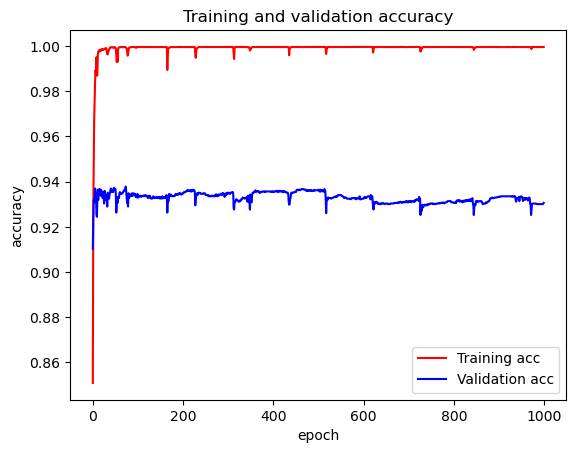

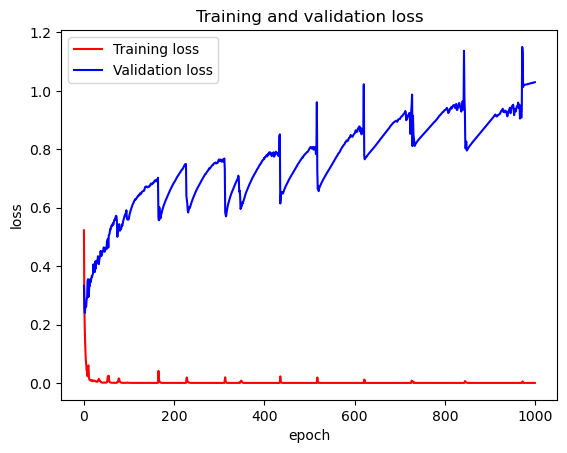

In [18]:
# Training and validation graph for over & underfitting analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()